In [1]:
import numpy as np
import pyfits
import math
from math import log10
import matplotlib.pyplot as plt
import scipy
from scipy.stats import binned_statistic
from scipy.stats import binned_statistic_2d
from matplotlib import rc
import pickle
import os
import astropy as ap
from astropy.cosmology import WMAP7

os.chdir('/Users/nitya/Work/Data/Project1/measurements')
print os.getcwd()
file2 = open(r'bin_opt_inf.pkl', 'rb')
d = pickle.load(file2)
file2.close()
#What's up with 445?

print np.shape(d)
# indz = np.where(d[:,0]!=445)[0]
# d = d[indz]
# print np.shape(d)
bins = [np.int(d[:,0][i]) for i in range(len(d[:,0]))]




/Users/nitya/Documents/new_data
(467, 3)


In [3]:
os.chdir('/Users/nitya/Work/Data/Project1/magphys')
print os.getcwd()
file1 = [str(bins[i]) + '.0' + '.fit' for i in range(len(bins))]

lines = np.asarray([open(file1[i]).readlines() for i in range(len(bins))])
print np.shape(lines)
ble = np.vectorize(np.float)

b = np.asarray([ble(lines[i][2].split()) for i in range(len(bins))])

rjy = b[:,4]
lambda_eff = 0.6189
print rjy[0:10]

rlum = [rjy[i]*3.0*(10.0**14.0)/(0.6189) for i in range(len(bins))]

print rlum[0:10]
c = np.asarray([ble(lines[i][10].split()) for i in range(len(bins))])
#3: TauV 2: mu 4: SSFR 5: "Mass" 6: Ldust in solar luminosities
ssfr = c[:,4]
log_ssfr = np.asarray([log10(c[:,4][i]) for i in range(len(bins))])
mass =c[:,5]

r_mtol = np.asarray([mass[i]/rlum[i] for i in range(len(bins))])

/Users/nitya/Documents/magphys
(467, 681)
[  3.12700000e-17   3.12700000e-17   3.12700000e-17   3.12700000e-17
   3.12700000e-17   3.12700000e-17   3.12700000e-17   3.12700000e-17
   3.12700000e-17   3.12700000e-17]
[0.01515753756665051, 0.01515753756665051, 0.01515753756665051, 0.01515753756665051, 0.01515753756665051, 0.01515753756665051, 0.01515753756665051, 0.01515753756665051, 0.01515753756665051, 0.01515753756665051]


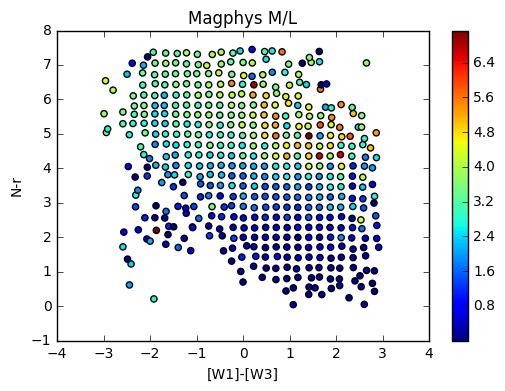

In [3]:
inf = np.asarray(d[:,2])
opt = np.asarray(d[:,1])


plt.scatter(inf,opt,c = r_mtol,  cmap = plt.cm.jet)
plt.xlabel('[W1]-[W3]')
plt.ylabel('N-r')
plt.title('Magphys M/L')
plt.colorbar()
plt.show()



('bins', 'inf', 'opt', 'mag', 'uv', '0.5nn500', '0.5nn1000', '1.0nn500', '1.0nn1000', 'counts')
317


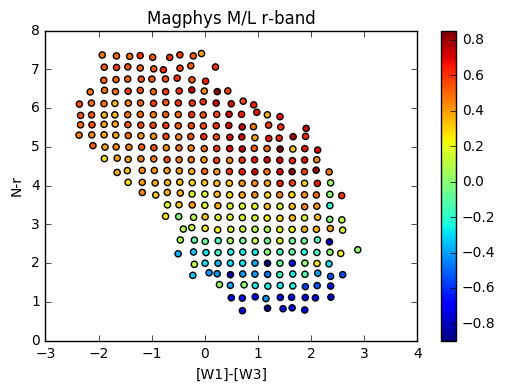

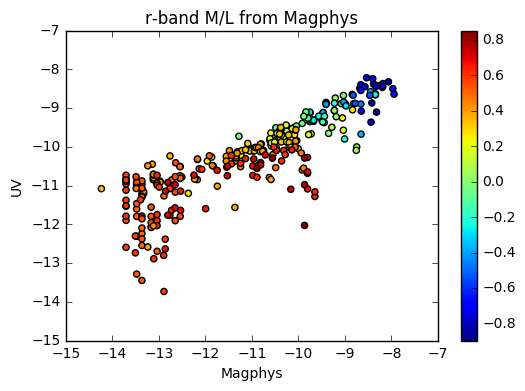

In [4]:
os.chdir('/Users/nitya/Documents/new_data')
file1 = open(r'binned_data', 'rb')
dt = pickle.load(file1)
file1.close()
print dt.dtype.names
ind = np.where(dt['counts'] > 5.0)[0]
print len(dt[ind])
dt = dt[ind]

plt.scatter(inf[ind],opt[ind],c = np.log10(r_mtol[ind]),  cmap = plt.cm.jet)
plt.xlabel('[W1]-[W3]')
plt.ylabel('N-r')
plt.title('Magphys M/L r-band')
plt.colorbar()
plt.show()

plt.scatter(dt['mag'],dt['uv'],c = np.log10(r_mtol[ind]),  cmap = plt.cm.jet)
plt.xlabel('Magphys')
plt.ylabel('UV')
plt.title('r-band M/L from Magphys')
plt.colorbar()
plt.show()